# Exploring UV extinction curves – Part 2 – SOLUTIONS

Solutions proposed for Part 2.

## Imports

The first step will be to import the libraries we will be using throughout this tutorial: 

- _matplotlib.pyplot_ for plotting data
- _numpy_ for array manipulations
- _Simbad_ from _astroquery.simbad_ to query the SIMBAD astronomical database.
- _curve_fit_ from scipy.optimize for data-fitting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astroquery.simbad import Simbad
from scipy.optimize import curve_fit

## Functions needed

Functions defined in the tutorial that will be used in the solutions of the exercises:

In [2]:
def FMpar(x, C1, C2, C3, C4, xo, gamma):
    
    """
    Parametrization of UV extinction curve according to Fitzpatrick and Massa 1990
    
    Inputs:
    :param x: input inverse-wavelength arrays (x = 1/wavelength)
    :type x: float array
    :param C1, C2, C3, C4, xo, gamma: input parameters to be fitted
    :type C1, C2, C3, C4, xo, gamma: float
    
    Outputs: 
    :return: k, extinction curve evaluated for the different x's
    :rtype: float array
    """

    F = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] >= 5.9:
            F = 0.5392*(x-5.9)**2+0.05644*(x-5.9)**3
        
    D = x**2/((x**2-xo**2)**2+x**2*gamma**2)
    
    k = C1 + C2*x + C3*D + C4*F
    
    return k

## Exercises

Now you can try to do it yourself! Try to obtain the extinction curve of a Large Magellanic Cloud (LMC) following the steps presented for the SMC one and look for the differences in the trend between the two.

### 1. Load the data

The targets for this exercise will be:

- Sk -69 206 (reddened star) - wav_sk_69_206_sw.txt, flux_sk_69_206_sw.txt, wav_sk_69_206_lw.txt, flux_sk_69_206_lw.txt
- Sk -67 5 (unreddened star) - wav_sk_67_5_sw.txt, flux_sk_67_5_sw.txt, wav_sk_67_5_lw.txt, flux_sk_67_5_lw.txt

In [3]:
wav_sk_69_206_sw = np.loadtxt('wav_sk_69_206_sw.txt')
flux_sk_69_206_sw = np.loadtxt('flux_sk_69_206_sw.txt')

wav_sk_69_206_lw = np.loadtxt('wav_sk_69_206_lw.txt')
flux_sk_69_206_lw = np.loadtxt('flux_sk_69_206_lw.txt')

wav_sk_67_5_sw = np.loadtxt('wav_sk_67_5_sw.txt')
flux_sk_67_5_sw = np.loadtxt('flux_sk_67_5_sw.txt')

wav_sk_67_5_lw = np.loadtxt('wav_sk_67_5_lw.txt')
flux_sk_67_5_lw = np.loadtxt('flux_sk_67_5_lw.txt')

### 2. Plot the spectra of both stars

Remember that normally in these studies you plot the logarithm of the fluxes versus the inverse of the wavelengths.

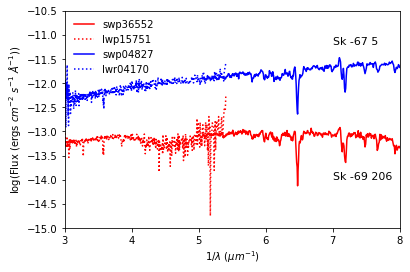

In [4]:
wavinv_sk_69_206_sw = 1/(wav_sk_69_206_sw*1e-4) # mu-m
wavinv_sk_69_206_lw = 1/(wav_sk_69_206_lw*1e-4) # mu-m
wavinv_sk_67_5_sw = 1/(wav_sk_67_5_sw*1e-4) # mu-m
wavinv_sk_67_5_lw = 1/(wav_sk_67_5_lw*1e-4) # mu-m

fig = plt.figure()
ax = plt.subplot(111)

plt.plot(wavinv_sk_69_206_sw,np.log10(flux_sk_69_206_sw),'r',label='swp36552')
plt.plot(wavinv_sk_69_206_lw,np.log10(flux_sk_69_206_lw),'r:',label='lwp15751')
plt.text(7, -14, 'Sk -69 206', fontsize = 11)
plt.plot(wavinv_sk_67_5_sw,np.log10(flux_sk_67_5_sw),'b',label='swp04827')
plt.plot(wavinv_sk_67_5_lw,np.log10(flux_sk_67_5_lw),'b:',label='lwr04170')
plt.text(7, -11.2, 'Sk -67 5', fontsize = 11)

ax.set_xlabel('1/$\lambda$ ($\mu m^{-1}$)')
ax.set_ylabel(r'log(Flux (ergs $cm^{-2}$ $s^{-1}$ $\AA^{-1}$))')
ax.set_xlim([3, 8])
ax.set_ylim([-15, -10.5])

plt.legend(loc='best',frameon=False)

plt.show()

### 3. Find the values for the B and V bands in SIMBAD

For the reddened star:

In [5]:
Simbad.add_votable_fields('flux(B)','flux(V)')
table_sk_69_206 = Simbad.query_object('Sk -69 206')
table_sk_69_206

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_B,FLUX_V,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,int32
SK -69 206,05 35 35.9718,-69 07 06.552,14,14,0.017,0.017,90,A,O,2020yCat.1350....0G,12.99,12.82,1


For the unreddened star:

In [6]:
table_sk_67_5 = Simbad.query_object('Sk -67 5')
table_sk_67_5

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_B,FLUX_V,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,int32
HD 268605,04 50 18.9258,-67 39 38.036,14,14,0.027,0.027,90,A,O,2020yCat.1350....0G,11.2,11.377,1


Now, calculate the $E(B-V)$ value: 

In [7]:
V_69_206 = float(table_sk_69_206['FLUX_V'])
B_69_206 = float(table_sk_69_206['FLUX_B'])

V_67_5 = float(table_sk_67_5['FLUX_V'])
B_67_5 = float(table_sk_67_5['FLUX_B'])

E_B_V = (B_69_206-V_69_206)-(B_67_5-V_67_5)

print("The value of E(B-V) is equal to",E_B_V)

The value of E(B-V) is equal to 0.3470001220703125


### 4. Create the scattered extinction curve

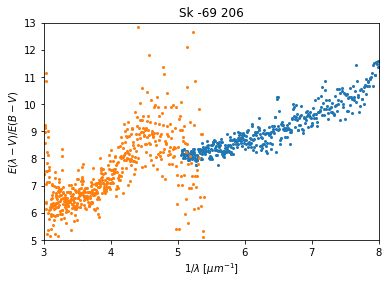

In [8]:
plt.figure()
plt.plot(wavinv_sk_69_206_sw,np.abs((np.log(flux_sk_69_206_sw/flux_sk_67_5_sw)-np.log(V_69_206/V_67_5))/E_B_V),'o',markersize=2)
plt.plot(wavinv_sk_69_206_lw,np.abs((np.log(flux_sk_69_206_lw/flux_sk_67_5_lw)-np.log(V_69_206/V_67_5))/E_B_V),'o',markersize=2)
plt.xlim([3,8])
plt.ylim([5,13])
plt.xlabel(r'$1/\lambda$ $[\mu m^{-1}]$')
plt.ylabel(r'$E(\lambda-V)/E(B-V)$')
plt.title('Sk -69 206')
plt.show()

### 5. Parametrize the curve

First, obtain the parameters for the curve fitting:

In [9]:
wvinv = np.concatenate((wavinv_sk_69_206_lw,wavinv_sk_69_206_sw))
k_lam_V = np.concatenate((np.abs((np.log(flux_sk_69_206_lw/flux_sk_67_5_lw)-np.log(V_69_206/V_67_5))/E_B_V),np.abs((np.log(flux_sk_69_206_sw/flux_sk_67_5_sw)-np.log(V_69_206/V_67_5))/E_B_V)))

prob = np.where(np.isnan(k_lam_V))[0]

wvinv[prob] = 0
k_lam_V[prob] = 0

ic = np.array([1.0,1.0,1.0,1.0,4.6,1.0])

parameters, covariance = curve_fit(FMpar, wvinv, k_lam_V, p0 = ic)

print('Parameters obtained for fit: \n')
print('C1: ',parameters[0])
print('C2: ',parameters[1])
print('C3: ',parameters[2])
print('C4: ',parameters[3])
print('xo: ',parameters[4])
print('gamma: ',parameters[5])

Parameters obtained for fit: 

C1:  3.3580821928146998
C2:  0.8676679164848033
C3:  0.6706433256906779
C4:  0.07496201245635326
xo:  4.521792104440524
gamma:  0.6000692243015842


Once you have that, include the fit in the extinction curve you obtained:

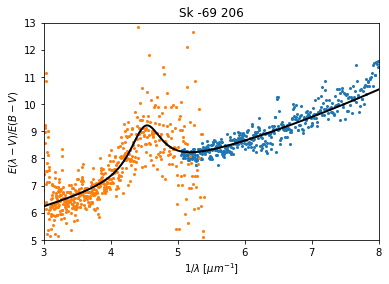

In [10]:
n = 1000
x_wavinv = np.linspace(3,8,n)

F = 0.5392*(x_wavinv-5.9)**2+0.05644*(x_wavinv-5.9)**3
D = x_wavinv**2/((x_wavinv**2-parameters[4]**2)**2+x_wavinv**2*parameters[5]**2)
k = parameters[0] + parameters[1]*x_wavinv + parameters[2]*D + parameters[3]*F

plt.figure()
plt.plot(wavinv_sk_69_206_sw,np.abs((np.log(flux_sk_69_206_sw/flux_sk_67_5_sw)-np.log(V_69_206/V_67_5))/E_B_V),'o',markersize=2)
plt.plot(wavinv_sk_69_206_lw,np.abs((np.log(flux_sk_69_206_lw/flux_sk_67_5_lw)-np.log(V_69_206/V_67_5))/E_B_V),'o',markersize=2)
plt.plot(x_wavinv,k,'k',linewidth=2)
plt.xlim([3,8])
plt.ylim([5,13])
plt.xlabel(r'$1/\lambda$ $[\mu m^{-1}]$')
plt.ylabel(r'$E(\lambda-V)/E(B-V)$')
plt.title('Sk -69 206')
plt.show()

Can you see the difference in the trend followed by the extinction curve between this case (LMC) and the one before (SMC)? More information about the different trends can be found in <a href="https://arxiv.org/pdf/astro-ph/0305257.pdf">Gordon et al. 2003</a>.

## Additional Resources

For more information about the MAST archive and details about mission data: 

<a href="https://mast.stsci.edu/api/v0/index.html">MAST API</a> <br>
<a href="https://archive.stsci.edu/iue/">International Ultraviolet Explorer Page (MAST)</a> <br>
<a href="https://archive.stsci.edu/iue/mdr_help.html">IUE Data Retrieval Help Page</a> 

For more information about extinction curves and their parametrization:


<a href="https://ui.adsabs.harvard.edu/abs/2003ApJ...594..279G/abstract">A quantitative comparison of SMC, LMC and Milky Way UV to NIR extinction curves</a> <br>
<a href="https://adsabs.harvard.edu/pdf/1990ApJS...72..163F">An analysis of the shapes of the ultraviolet extinction curves. III. An atlas of ultraviolet extinction curves</a> 

## About this Notebook

**Author**: Clara Puerto Sánchez <br>
**Updated on**: 06/07/2022

## Citations

If you use `astropy`, `numpy`, `scipy` or `matplotlib` for published research, please cite the
authors. Follow these links for more information about citing them:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)
* [Citing `numpy`](https://numpy.org/citing-numpy/)
* [Citing `scipy`](https://scipy.org/citing-scipy/)
* [Citing `matplotlib`](https://matplotlib.org/stable/users/project/citing.html)

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>